In [96]:
# Name: Abhishek Agarwal
# Section leader:  Stephen Kim
# Date: Tue 30th, 2021
# Ista 350 Final Project
# Description:  This is the final project for ISTA350

import pandas as pd, matplotlib.pyplot as plt, statsmodels.api as sm
import numpy as np
import seaborn as sns
import opendatasets as od
import os

In [97]:
!pip install opendatasets

In [98]:
# For this data to be accsed you need to generate a json access key from the kaggle account
def get_datasets():
    # Location where Data is saved on the net
    dataset = "https://www.kaggle.com/anuranroy/ipldatasets"
    # Downlaod the data
    od.download(dataset)
    # The data will be saved in the ipldatasets folder
    data_dir = './ipldatasets'
    # Accessing the two csv files
    matches_df = pd.read_csv('ipldatasets/matches.csv')
    deliveries_df = pd.read_csv('ipldatasets/deliveries.csv')
    return matches_df, deliveries_df

matches_df, deliveries_df = get_datasets()

Skipping, found downloaded files in "./ipldatasets" (use force=True to force download)


In [99]:
matches_df # Data collect between 2008 - 2017

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


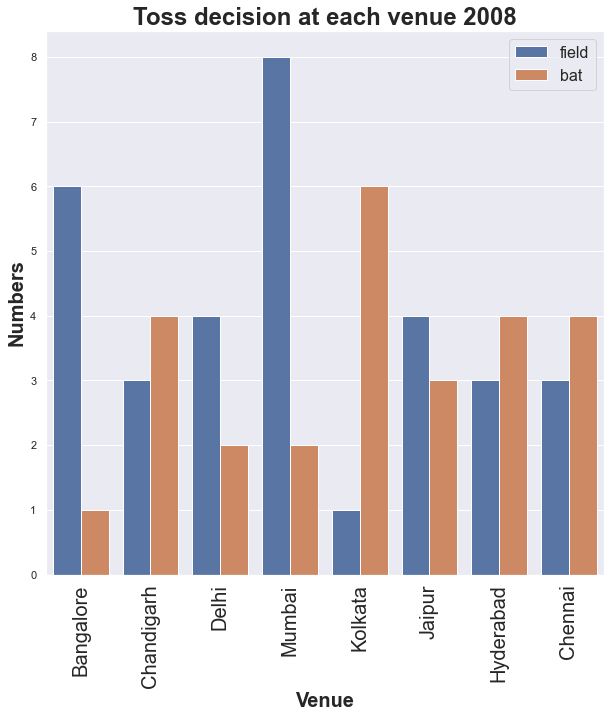

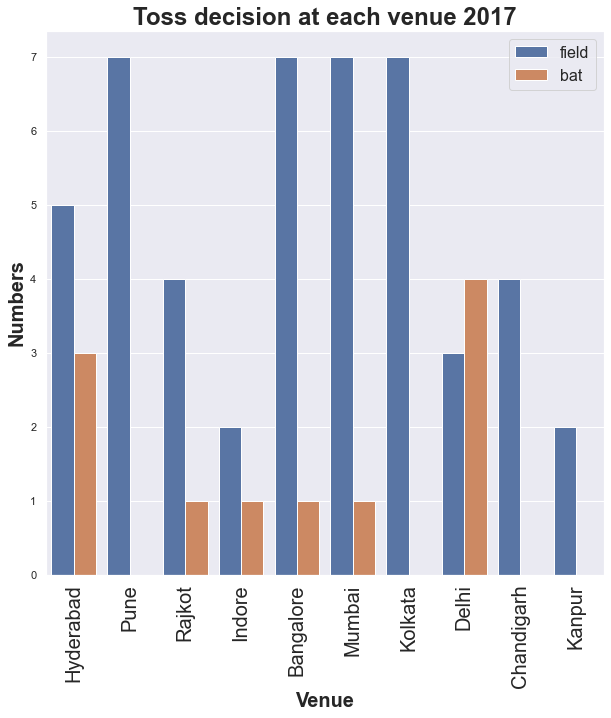

In [100]:
# Toss Decision 
'''
This function will create a plot which create a comprassion between venue and toss. 
We will only emphasis on the first 12 venue as they are present in India.
We observe this phonomonon to predict what should one choose if they win a toss at these venue
We can acheive result for each year by passing the year as the argument
'''

'''
Function name: venue_toss
Parameter: year : specified year
Return: None
Description: Toss decision at each venue
'''
def venue_toss(year):
    # Figure size 10 X 10
    fig1, ax1 = plt.subplots(figsize = (10,10))
    # Gather data for a particular season
    result_year = matches_df[matches_df['season'] == year]
    # Make the count plot between field and bat
    sns.countplot(x = result_year['city'], hue = result_year['toss_decision'])
    # Necessary requirement
    tit = 'Toss decision at each venue ' + str(year)
    plt.title(tit ,fontsize=24, fontweight='bold')
    plt.xticks(fontsize=20,rotation=90)
    plt.xlabel('Venue',fontsize=20, fontweight='bold')
    plt.ylabel('Numbers',fontsize=20, fontweight='bold')
    plt.legend(fontsize=16)
    plt.show()
venue_toss(2008)
venue_toss(2017)


In [101]:
'''
We will sort our team performance by batting first and batting second
Win by runs => batting first 
win by wickets => batting second
'''

'''
Function name: wins_chart
Parameter: 
  year : specified year
  wins_descrb:  specified type of win
Return: None
Description: Pie chart for type of win specified
'''
def wins_chart(year, wins_descb):
    result_year = matches_df[matches_df['season'] == year]
    # We shouldn't include the data with 0 which indicate the team lost
    data = result_year[(result_year[wins_descb]>0)]  
    # Create a mini dataframe with specified paramter
    summary_data = pd.DataFrame(data, columns = [wins_descb, 'winner'])
    # Teams
    teams_lst = ['Kolkata Knight Riders', 'Mumbai Indians', 'Kings XI Punjab', 'Chennai Super Kings','Royal Challengers Bangalore', 'Sunrisers Hyderabad','Rajasthan Royals'  ]
    # Wins per team for the season
    wins_lst = []
    for i in teams_lst:
        wins_lst.append(summary_data[summary_data['winner']== i].count()['winner'])
    # Explode the highest wins
    explode_lst = [0 for i in wins_lst]
    index = wins_lst.index(max(wins_lst)) #Where to explode our pie
    explode_lst[index] = 0.3
    explode = tuple(explode_lst)
    # Make a the pie chart
    fig1, ax1 = plt.subplots()
    ax1.pie(wins_lst, explode = explode, labels =teams_lst, shadow=True, radius = 2,autopct='%1.1f%%',startangle=90)

    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.set_title(wins_descb + " "+ str(year),  pad=100, fontsize=24, fontweight='bold')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.show()



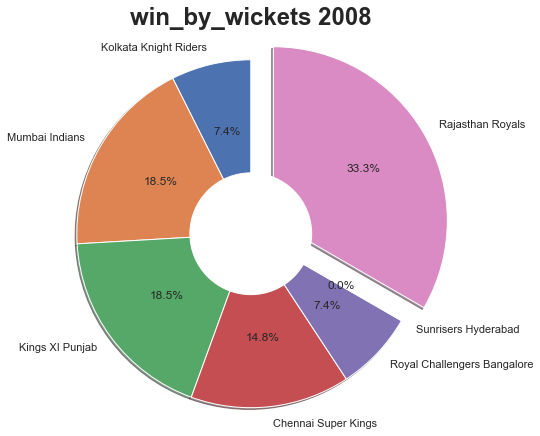

In [102]:
wins_chart(2008, 'win_by_wickets')

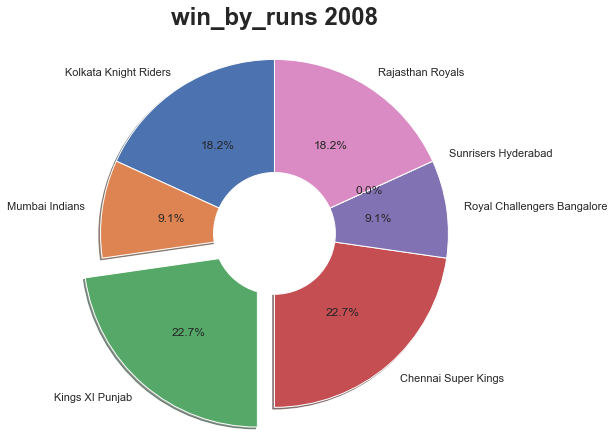

In [103]:
wins_chart(2008, 'win_by_runs')

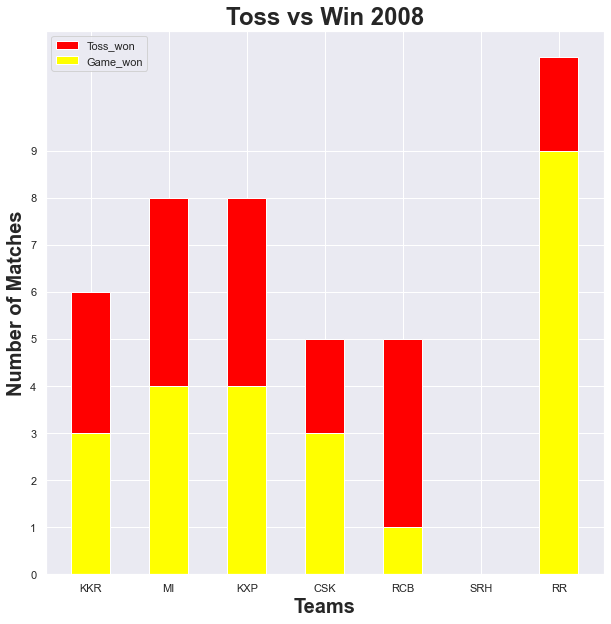

In [104]:
'''
Now let us look at the toss to win ration in these year
'''

'''
Function name: toss_win
Parameter: year : specified year
Return: None
Description: the toss to win ratio in the year
'''
def toss_win(year):  
    result_year = matches_df[matches_df['season'] == year]
    teams_lst = ['Kolkata Knight Riders', 'Mumbai Indians', 'Kings XI Punjab', 'Chennai Super Kings','Royal Challengers Bangalore', 'Sunrisers Hyderabad','Rajasthan Royals'  ]
    toss_won = []
    game_won = []
    for i in teams_lst:
        # Count of toss won by the team
        toss_won.append(result_year[result_year['toss_winner']== i].winner.count())
        # Count of game won by the team
        game_won.append(result_year[(result_year['toss_winner']==i) & (result_year['winner']==i)].winner.count())
    # Arranging the data into the required dataframe
    data = [[teams_lst[i], toss_won[i],game_won[i]] for i in range (len(teams_lst))]
    new_df = pd.DataFrame(data, columns = ['Teams', 'Toss_won', 'Game_won'])
    
    # Make the plot
    fig1, ax1 = plt.subplots(figsize = (10,10))
    
    n_bins = 7
    ind = np.arange(n_bins)
    width = 0.50
    # Combine the two bar plot to summarrize the data
    p1 = plt.bar(ind, new_df['Toss_won'], width, color='Red', tick_label = ['KKR', 'MI', 'KXP', 'CSK', 'RCB',  'SRH', 'RR'])
    p2 = plt.bar(ind, new_df['Game_won'], width, color='Yellow')
    
    # Adding data to the plot
    plt.ylabel('Number of Matches',fontsize=20, fontweight='bold' )
    plt.xlabel('Teams', fontsize=20, fontweight='bold')
    plt.title('Toss vs Win ' + str(year), fontsize=24, fontweight='bold')
    plt.yticks(np.arange(0, 10, 1))
    plt.legend((p1[0], p2[0]), ('Toss_won', 'Game_won'))
    plt.show()
toss_win(2008)

In [105]:
deliveries_df # The second data frame

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [106]:
# As this is a T20 format, there are 20 overs in a match
# Thus now we will plot runs scored by over and create a reg line
overs_run_df = deliveries_df.groupby('over',axis=0).sum()
overs_run_df

,match_id,inning,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
over,,,,,,,,,,,,
1,17111970,14598,35259,81,539,52,248,32,0,8535,871,9406
2,16735202,14248,34880,0,489,40,262,32,0,10139,823,10962
3,16764234,14122,34273,0,392,42,231,40,0,11413,705,12118
4,16678664,14062,34004,0,340,22,230,46,0,11769,638,12407
5,16621283,13997,33794,0,322,32,177,34,5,11856,570,12426
6,16492607,13966,33754,0,332,41,227,47,0,11865,647,12512
7,16450119,13895,33525,0,362,22,200,23,0,9476,607,10083
8,16434386,13858,33317,0,300,22,173,27,0,10215,522,10737
9,16431313,13814,33289,0,295,44,172,20,0,10596,531,11127


/Applications/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


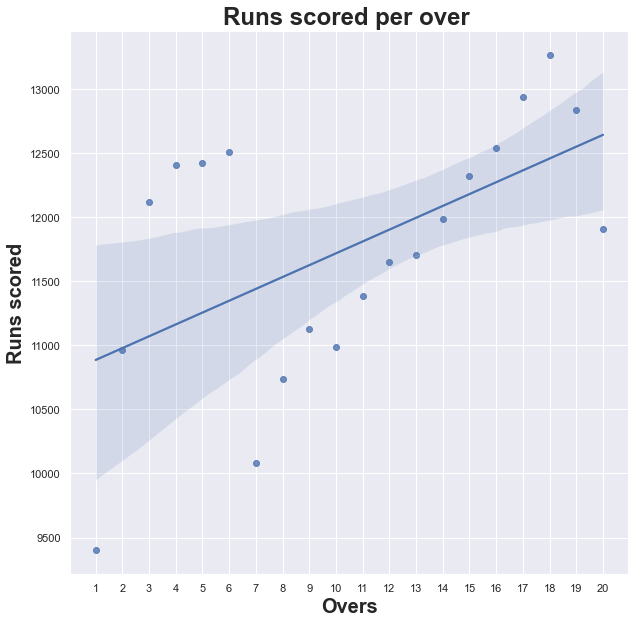

In [111]:
'''
Function name: make_plot()
Parameter: 
 x : X values
 y : Y values
 xlabel : label of x axis
 ylabel : label of y axis 
 title : Title of the plot
Return: None 
Description: Make a scatter plot with reg line
'''
def make_plot(x , y, xlabel, ylabel, title):
    
    fig1, ax1 = plt.subplots(figsize = (10,10))
    sns.regplot(x, y)
    
    plt.xlabel(xlabel,fontsize=20, fontweight='bold' )
    plt.ylabel(ylabel, fontsize=20, fontweight='bold')
    plt.title(title, fontsize=24, fontweight='bold')
    start = x[0]
    end = x[-1] + 1
    plt.xticks(np.arange(start, end, 1))

# Case 1
x = overs_run_df.index.values
y = overs_run_df['total_runs'].values
xlabel = 'Overs'
ylabel = 'Runs scored'
title = 'Runs scored per over '
make_plot(x , y, xlabel, ylabel, title)    





/Applications/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


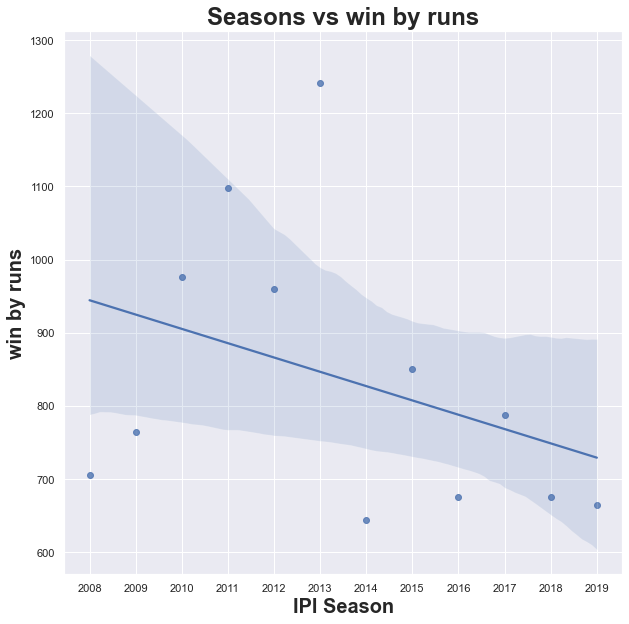

In [112]:
#case2 : Lets us observe win by run per season and win by wicket per season
scatter_data_df = matches_df.groupby('season',axis=0).sum()
x = scatter_data_df.index.values
y = scatter_data_df['win_by_runs'].values
xlabel = 'IPl Season'
ylabel = 'win by runs'
title = 'Seasons vs win by runs'
make_plot(x , y, xlabel, ylabel, title)    


/Applications/Anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


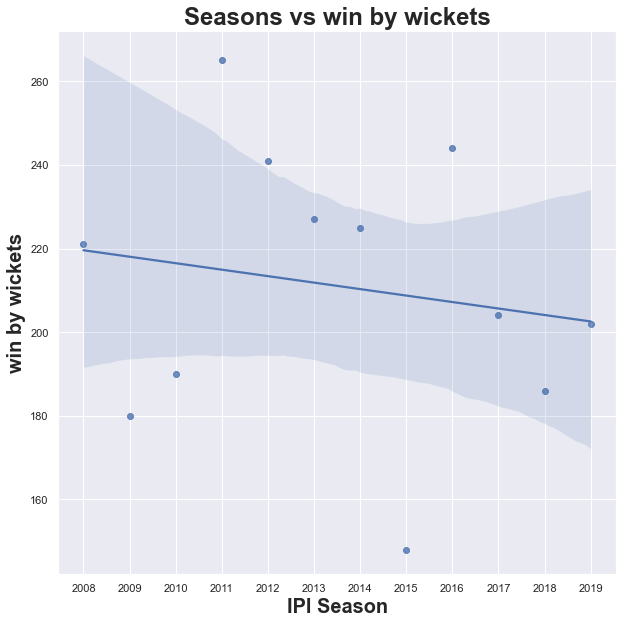

In [113]:
#case3 : Lets us observe win by run per season and win by wicket per season
scatter_data_df = matches_df.groupby('season',axis=0).sum()
x = scatter_data_df.index.values
y = scatter_data_df['win_by_wickets'].values
xlabel = 'IPl Season'
ylabel = 'win by wickets'
title = 'Seasons vs win by wickets'
make_plot(x , y, xlabel, ylabel, title)  